<a href="https://colab.research.google.com/github/actualIslam/penguins_task/blob/main/penguins_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

`species`: Categorical values that specify which group the Penguin belongs to - صِنف البطريق

`island`: Categorical values that specify where the Penguin live - جزيرة

`bill_length_mm`: Numeric values - Length of which is the dorsal ridge at top the bill - طول المنقار

`bill_depth_mm`: Numeric values - Dipth of culmen - عمق المنقار

`flipper_length_mm`: Numeric values - Length of flipper - طول الزعانف

`body_mass_g`: Numeric values - Penguin body mass by grams - كتلة الجسم

`sex`: Categorical values that specify type of Penguin - نوع البطريق

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [6]:
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
242,Gentoo,Biscoe,46.5,14.5,213.0,4400.0,Female
213,Chinstrap,Dream,46.8,16.5,189.0,3650.0,Female
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male
126,Adelie,Torgersen,38.8,17.6,191.0,3275.0,Female
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,Female


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [8]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
# droping rows with null values in bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g
# because they are missing in same rows and it won't do us much change

df = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [10]:
# filling null values in column sex with the mode in df['sex']

df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df.isna().sum()

<ipython-input-10-d81dd9ac383a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'].fillna(df['sex'].mode()[0], inplace=True)


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [11]:
mem_usage_before = df.memory_usage(deep=True)

In [33]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [34]:
# convert numerical types
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g'] = df['body_mass_g'].astype('float32')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   bill_length_mm     342 non-null    float32 
 3   bill_depth_mm      342 non-null    float32 
 4   flipper_length_mm  342 non-null    float32 
 5   body_mass_g        342 non-null    float32 
 6   sex                342 non-null    category
 7   bill_size          342 non-null    float32 
 8   bill_ratio         342 non-null    float32 
dtypes: category(3), float32(6)
memory usage: 12.1 KB


Calculate memory saved after type conversion

In [15]:
mem_usage_after = df.memory_usage(deep=True)

In [16]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 66 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [17]:
# There is no inconsistency

# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [38]:
df_num = df.select_dtypes(include='number')
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921932,5.459584,32.099998,39.225000,44.450001,48.500000,59.599998
bill_depth_mm,342.0,17.151171,1.974793,13.100000,15.600000,17.299999,18.700001,21.500000
flipper_length_mm,342.0,200.915207,14.061714,172.000000,190.000000,197.000000,213.000000,231.000000
body_mass_g,342.0,4201.754395,801.954529,2700.000000,3550.000000,4050.000000,4750.000000,6300.000000
bill_size,342.0,750.785645,115.421631,497.549988,667.690033,730.824982,807.155014,1127.359985
bill_ratio,342.0,2.605649,0.497375,1.639810,2.160344,2.575067,3.098777,3.612676


In [39]:
df_cat = df.select_dtypes(include='category')
df_cat.describe().T

,count,unique,top,freq
species,342,3,Adelie,151
island,342,3,Biscoe,167
sex,342,2,Male,177


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

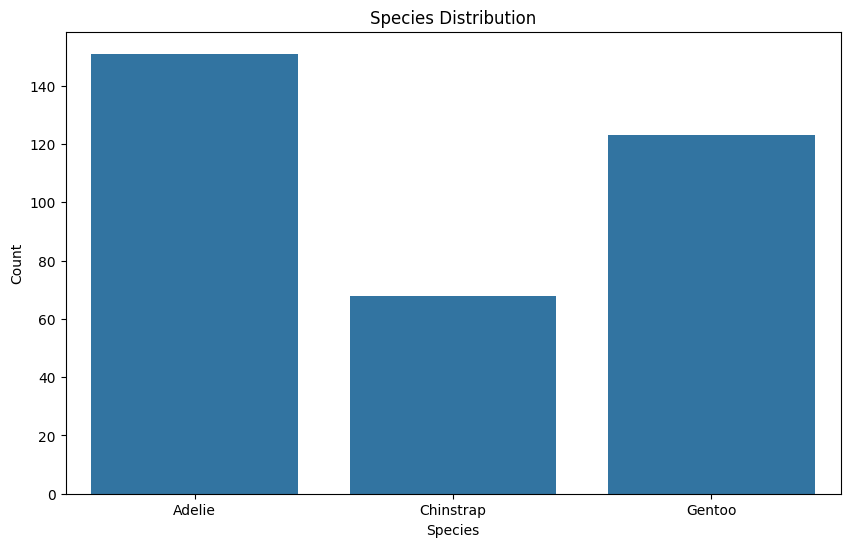

In [20]:
species_counts = df['species'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.show()

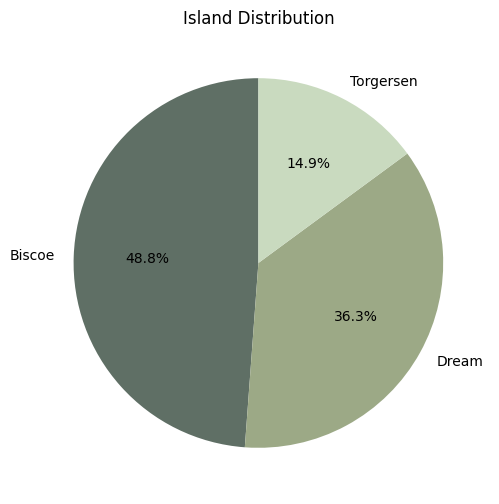

In [21]:
island_counts = df['island'].value_counts()

plt.figure(figsize=(10, 6))
island_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#5F6F65', '#9CA986', '#C9DABF'])
plt.ylabel('')
plt.title('Island Distribution')
plt.show()

<ipython-input-22-a9415a978f54>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.values, y=sex_counts.index, palette='pastel', width=0.3, orient = 'h')


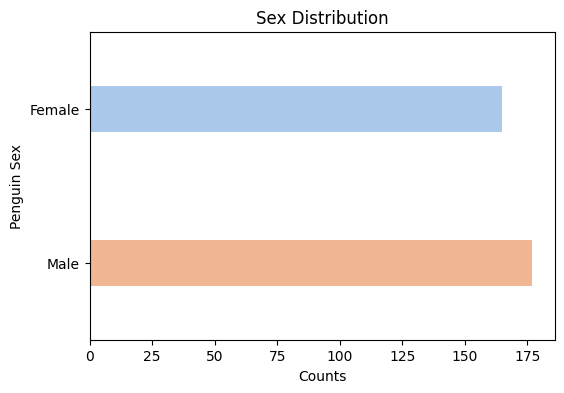

In [22]:
sex_counts = df['sex'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sex_counts.values, y=sex_counts.index, palette='pastel', width=0.3, orient = 'h')
plt.xlabel('Counts')
plt.ylabel('Penguin Sex')
plt.title('Sex Distribution')
plt.show()

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

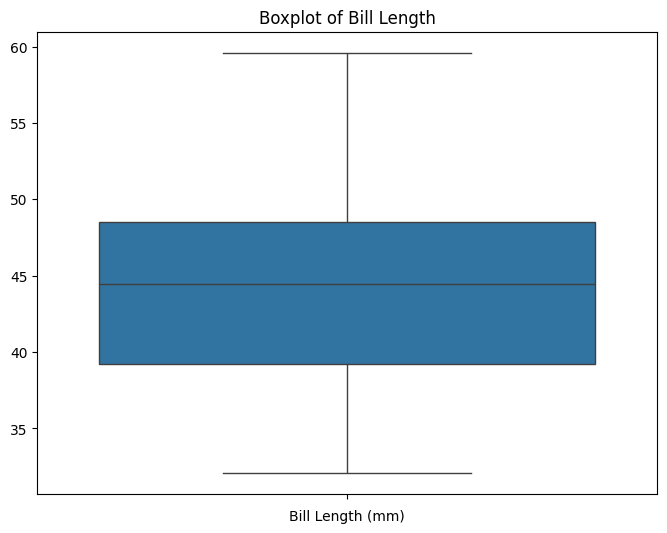

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['bill_length_mm'])
plt.xlabel('Bill Length (mm)')
plt.ylabel('')
plt.title('Boxplot of Bill Length')
plt.show()

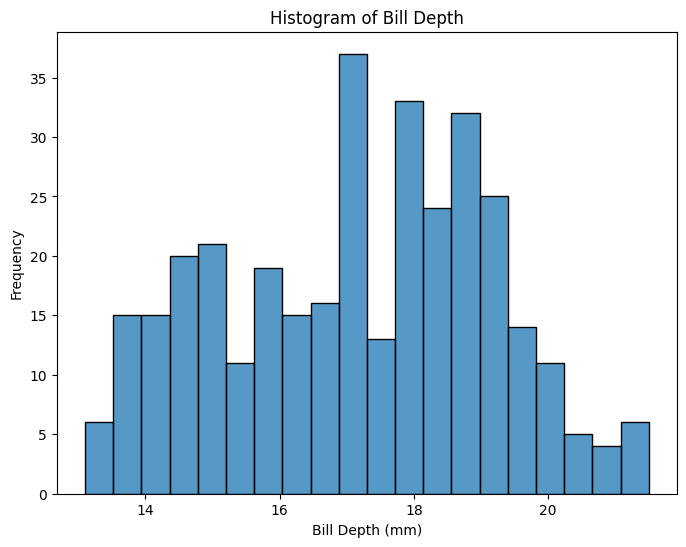

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['bill_depth_mm'], bins=20)
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Bill Depth')
plt.show()

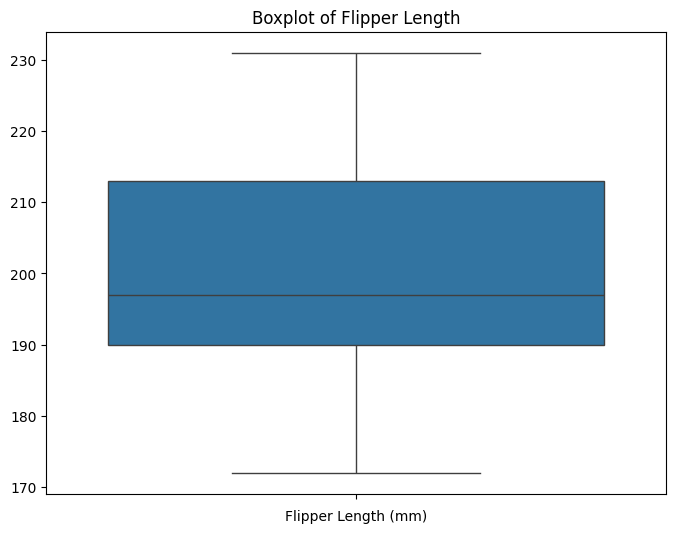

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['flipper_length_mm'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('')
plt.title('Boxplot of Flipper Length')
plt.show()

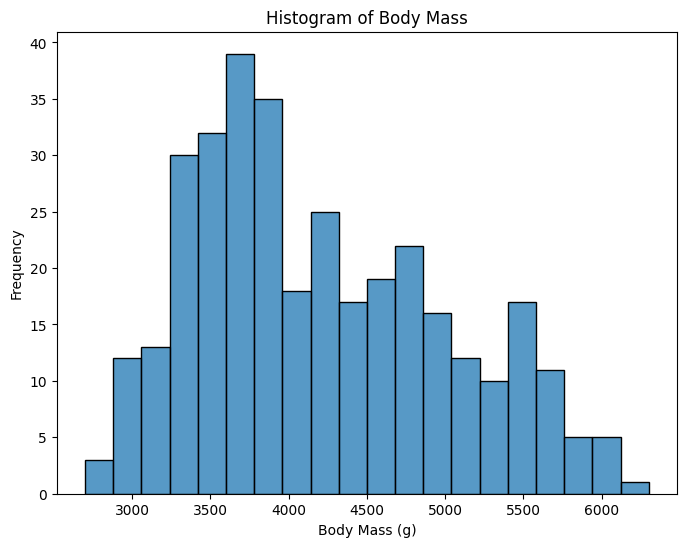

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['body_mass_g'], bins=20)
plt.ylabel('Frequency')
plt.title('Histogram of Body Mass')
plt.xlabel('Body Mass (g)')
plt.show()

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

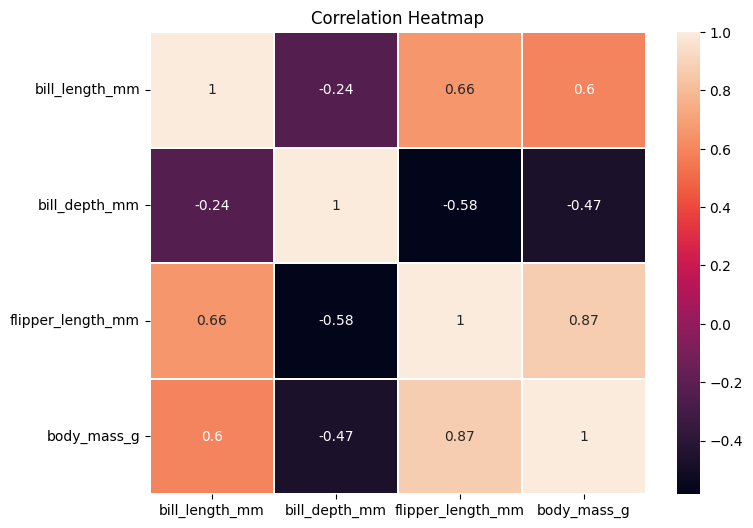

In [27]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='rocket', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()

Write down your observations based on the correlation heatmap.

Observations:

* There sounds to be strong correlation between **Flipper length** and **Body mass** with 0.87 correlation. The taller the flipper the bigger the mass

* Moderate correlation between **Flipper length** and **Bill length** with 0.66 correlation, **Bill length** and **Body mass** with 0.6 correlation. Which means if one variable changes the other may or may not change

* Weak correlation between the rest of each two variables. Correlation between **Bill depth** and **Bill length** is the strongest with -0.24 correlation, between **Body mass** and **Bill depth** has -0.47 correlation, between **Flipper length** and **Bill depth** has -0.58 correlation

* From the last point we can illustrate that **Bill depth** does not have a strong relationship with other variables except for **Bill length**

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [28]:
df['bill_size'] = df['bill_depth_mm'] * df['bill_length_mm']
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']

In [29]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size,bill_ratio
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983,2.090909
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988,2.270115
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963,2.238889
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998,1.901554
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male,809.580017,1.907767


Let's look at the correlation to see whether the newly created features are better.

<Axes: >

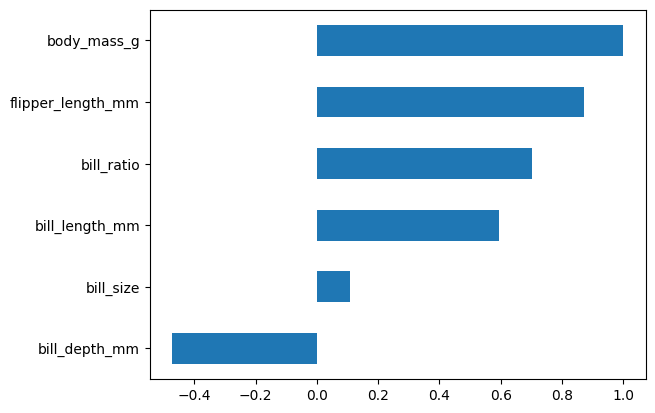

In [41]:
# This plots the correlation values for a specific column
# which is usually what we are interested in
new_corr = df.corr(numeric_only=True)
new_corr['body_mass_g'].sort_values().plot.barh()